In [1]:
import pandas as pd
df = pd.read_excel('F:\CodingEnvironment\dvrpsd\chitam2.xlsx')

In [6]:
result = df.groupby(['ni sta', 'ni dyn']).agg({
    # 'rd': 'mean',
    'td': 'mean',
    'time': 'mean'
}).reset_index()

# Display the result
print(result)

    ni sta  ni dyn           td        time
0       10       5  1597.329775    9.784322
1       10      10  1553.831461   23.335288
2       10      20  1522.665070   68.898892
3       10      30  1506.671511  141.499507
4       20       5  1474.252046   10.560423
5       20      10  1474.538998   23.642007
6       20      20  1526.795620   70.571099
7       20      30  1508.278136  144.461799
8       50       5  1542.685813   17.754793
9       50      10  1558.084145   31.062851
10      50      20  1517.842311   77.551318
11      50      30  1474.596691  157.524511
12     100       5  1530.073155   41.203432
13     100      10  1502.430345   55.270080
14     100      20  1499.527930  104.826619
15     100      30  1494.579802  225.657341


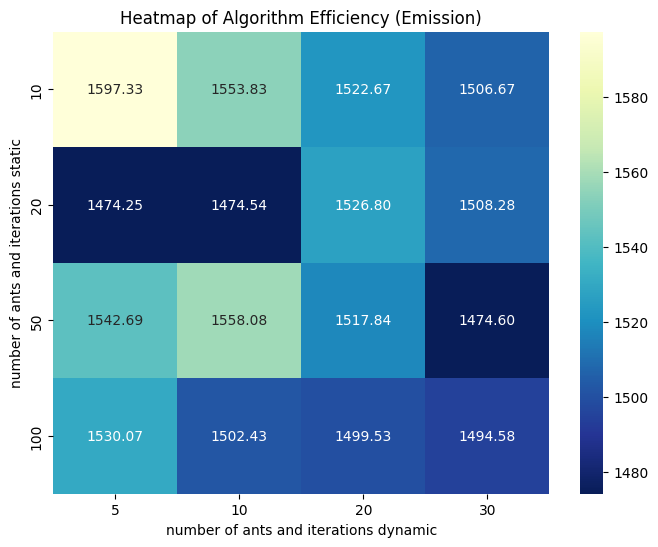

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'result' dataframe has 'file_name', 'ni_sta', 'ni_dyn', and 'average_time'
# Pivot the table to get a matrix form for heatmap
pivot_table = result.pivot(index='ni sta', columns='ni dyn', values='td')

# Draw the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu_r", fmt=".2f")
plt.title('Heatmap of Algorithm Efficiency (Emission)')
plt.xlabel('number of ants and iterations dynamic')
plt.ylabel('number of ants and iterations static')
plt.show()


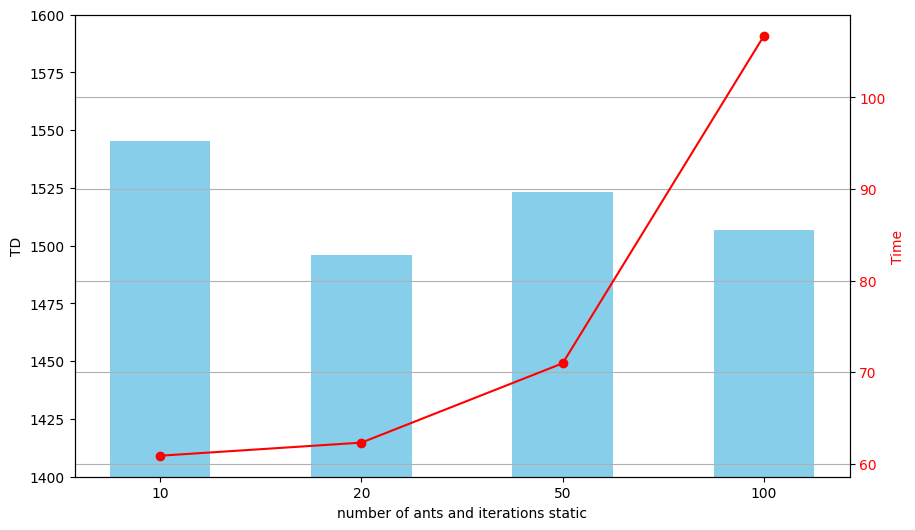

In [35]:
import matplotlib.pyplot as plt

# Grouping and aggregating the data
result_sta = result.groupby(['ni sta']).agg({
    'td': 'mean',
    'time': 'mean'
}).reset_index()

# Convert 'ni sta' to string type
result_sta['ni sta'] = result_sta['ni sta'].astype(str)

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting 'td' as bars on the left y-axis
ax1.bar(result_sta['ni sta'], result_sta['td'], color='skyblue', label='TD', width=0.5)  # Adjust width as needed
ax1.set_xlabel('number of ants and iterations static')
ax1.set_ylabel('TD', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Set specific y-axis range for the 'td' bar chart
ax1.set_ylim(1400, 1600) 

# Create another axis object for the right y-axis
ax2 = ax1.twinx()

# Plotting 'time' as a line on the right y-axis
ax2.plot(result_sta['ni sta'], result_sta['time'], color='red', marker='o', label='Time')
ax2.set_ylabel('Time', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding title
# plt.title('Combined Bar and Line Chart (TD and Time)')

# Display the plot
plt.grid(True)
plt.show()


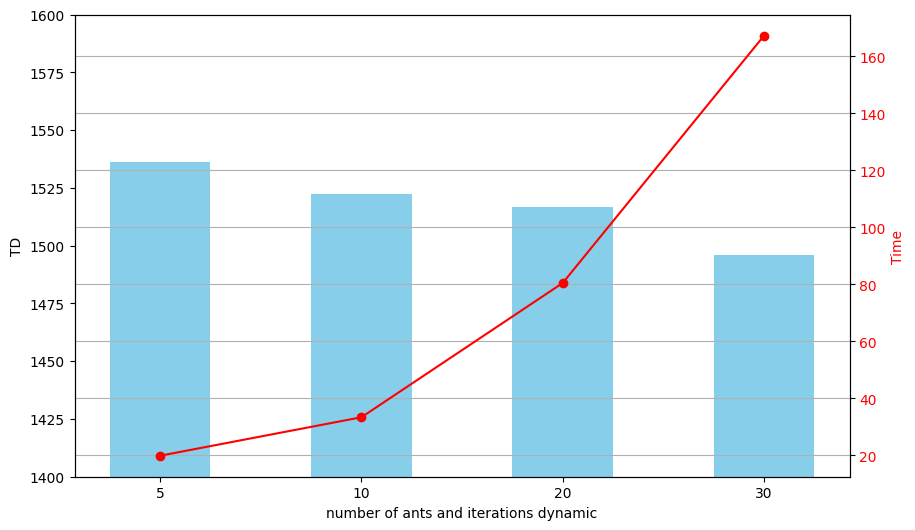

In [33]:
import matplotlib.pyplot as plt

# Grouping and aggregating the data
result_sta = result.groupby(['ni dyn']).agg({
    'td': 'mean',
    'time': 'mean'
}).reset_index()

# Convert 'ni sta' to string type
result_sta['ni dyn'] = result_sta['ni dyn'].astype(str)

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting 'td' as bars on the left y-axis
ax1.bar(result_sta['ni dyn'], result_sta['td'], color='skyblue', label='TD', width=0.5)  # Adjust width as needed
ax1.set_xlabel('number of ants and iterations dynamic')
ax1.set_ylabel('TD', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Set specific y-axis range for the 'td' bar chart
ax1.set_ylim(1400, 1600) 

# Create another axis object for the right y-axis
ax2 = ax1.twinx()

# Plotting 'time' as a line on the right y-axis
ax2.plot(result_sta['ni dyn'], result_sta['time'], color='red', marker='o', label='Time')
ax2.set_ylabel('Time', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding title
# plt.title('Combined Chart (TD and Time)')

# Display the plot
plt.grid(True)
plt.show()


In [1]:
import pandas as pd
barplot = pd.read_excel('F:\CodingEnvironment\dvrpsd\experiment\BarPlot.xlsx')
barplot.head()

,C1,C2,R1,R2,RC1,RC2
0,24.45,26.96,57.66,32.59,39.96,25.36
1,71.63,76.25,74.92,72.15,75.60,70.12
2,45.26,53.20,60.23,35.88,56.42,34.26
3,71.45,75.87,74.76,72.55,75.52,70.46
4,46.53,40.96,55.89,34.49,48.43,40.86


In [2]:
barplot_melted = barplot.melt(var_name="Category", value_name="Value")
barplot_melted

,Category,Value
0,C1,24.45
1,C1,71.63
2,C1,45.26
3,C1,71.45
4,C1,46.53
...,...,...
103,RC2,76.99
104,RC2,48.30
105,RC2,76.80
106,RC2,36.39


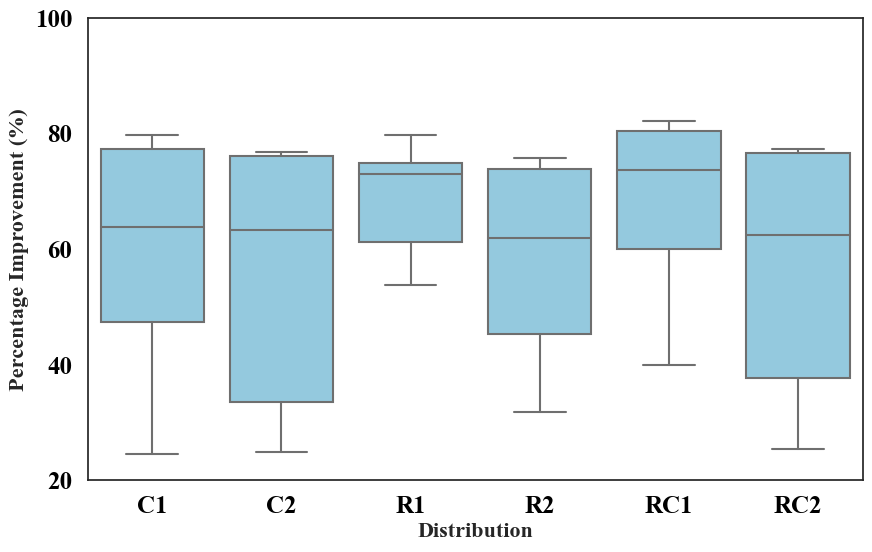

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

# Set font to Times New Roman globally
matplotlib.rc('font', family='Times New Roman')

# Figure settings
plt.figure(figsize=(10, 6))
sns.set(style="white")  # Clean background without grid
sns.set_context("notebook", font_scale=1.6)  # Larger font size for better visibility

# Sample data (replace `barplot_melted` with your actual DataFrame)
# Uncomment below lines to simulate sample data for testing
# import pandas as pd
# barplot_melted = pd.DataFrame({
#     "Category": np.random.choice(["A", "B", "C"], size=100),
#     "Value": np.random.uniform(20, 100, size=100)
# })

# Plot boxplot with light blue color for all boxes
ax = sns.boxplot(data=barplot_melted, x="Category", y="Value", color="skyblue")

# Customize labels
plt.xlabel("Distribution", fontsize=16, fontweight='bold', fontname="Times New Roman")
plt.ylabel("Percentage Improvement (%)", fontsize=16, fontweight='bold', fontname="Times New Roman")

# Customize ticks
ax.tick_params(axis='x', labelsize=18, labelcolor='black', which='major', width=1, direction='out', pad=5)
ax.tick_params(axis='y', labelsize=18, labelcolor='black', which='major', width=1, direction='out', pad=5)

# Apply bold font to tick labels explicitly
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
    tick.set_fontname("Times New Roman")
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
    tick.set_fontname("Times New Roman")

# Customize y-axis range and ticks
plt.ylim(20, 100)
plt.yticks(np.arange(20, 101, 20), fontname="Times New Roman", fontsize=18)

# Remove gridlines
ax.grid(False)

plt.savefig("PI_boxplot.pdf", format='pdf', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

In [ ]:
import pandas as pd
combined_CP = pd.read_excel("F:\CodingEnvironment\dvrpsd\experiment\combined_full.xlsx")
combined_CP.head()

,file_name,ited,sized,td,rd,obj,time
0,h100c101.csv,5,5,1473.350182,0,0.054023,6.123789
1,h100c101.csv,5,5,1387.981942,0,0.050893,5.283890
2,h100c101.csv,5,5,1494.756457,0,0.054808,6.196696
3,h100c101.csv,5,10,1664.483967,0,0.061032,8.449386
4,h100c101.csv,5,10,1511.337548,0,0.055416,8.711607


In [ ]:
cp_merge = combined_CP.groupby(['ited','sized']).agg({
    'obj': 'mean',
    'time': 'mean'
    
}).reset_index()

# Display the result
cp_merge.head()

,ited,sized,obj,time
0,5,5,0.053904,54.104707
1,5,10,0.054290,68.825230
2,5,20,0.054039,98.603970
3,5,30,0.054360,128.819870
4,10,5,0.053600,99.454968


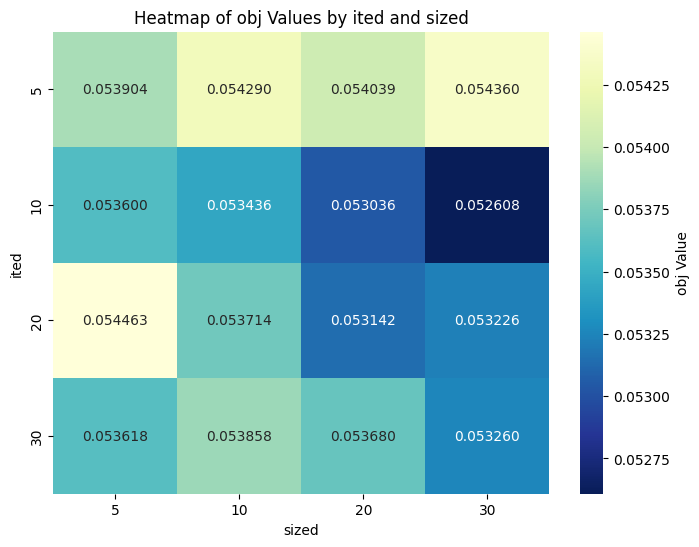

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to format it for the heatmap
heatmap_data = cp_merge.pivot(index="ited", columns="sized", values="obj")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".6f", cmap="YlGnBu_r", cbar_kws={'label': 'obj Value'})
plt.title("Heatmap of obj Values by ited and sized")
plt.xlabel("sized")
plt.ylabel("ited")
plt.show()

In [1]:
import pandas as pd
import seaborn as sns
df_100 = pd.read_csv("F:\CodingEnvironment\dvrpsd\experiment\Instance_100.csv")
df_200 = pd.read_excel("F:\CodingEnvironment\dvrpsd\experiment\Instance_200.xlsx")
df_400 = pd.read_csv("F:\CodingEnvironment\dvrpsd\experiment\Instance_400.csv")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add a 'source' column to each DataFrame
df_100['source'] = 'df_100'
df_200['source'] = 'result_full_200'
df_400['source'] = 'result_full_400'

# Function to extract category labels (specific for result_full_100 to handle lowercase)
def add_category_column_100(df):
    df['category'] = df['file_name'].str.extract(r'(c1|c2|r1|r2|rc1|rc2)', expand=False).str.upper()
    return df

# Function to extract category labels (for df_200 and df_400)
def add_category_column(df):
    df['category'] = df['file_name'].str.extract(r'(C1|C2|R1|R2|RC1|RC2)', expand=False)
    return df

# Apply the function to each DataFrame
df_100 = add_category_column_100(df_100)
df_200 = add_category_column(df_200)
df_400 = add_category_column(df_400)

# Concatenate all DataFrames
combined_df = pd.concat([df_100, df_200])

# Filter out any rows without a valid category label
combined_df = combined_df.dropna(subset=['category'])

# Plot scatter plot with both category and source information

In [ ]:
# combined_df

,file_name,seed,td,rd,source,category,time
0,h100c101.csv,1,1644.701000,0,df_100,C1,NaN
1,h100c101.csv,2,1618.996000,0,df_100,C1,NaN
2,h100c101.csv,3,1664.792000,0,df_100,C1,NaN
3,h100c101.csv,4,1774.085000,0,df_100,C1,NaN
4,h100c101.csv,5,1557.864000,0,df_100,C1,NaN
...,...,...,...,...,...,...,...
195,h200RC2_2_8.csv,2,4397.920314,-100,df_200,RC2,653.576034
196,h200RC2_2_8.csv,3,4370.900441,-100,df_200,RC2,635.416947
197,h200RC2_2_9.csv,1,3900.191587,-100,df_200,RC2,681.315069
198,h200RC2_2_9.csv,2,4046.587435,-100,df_200,RC2,649.910878


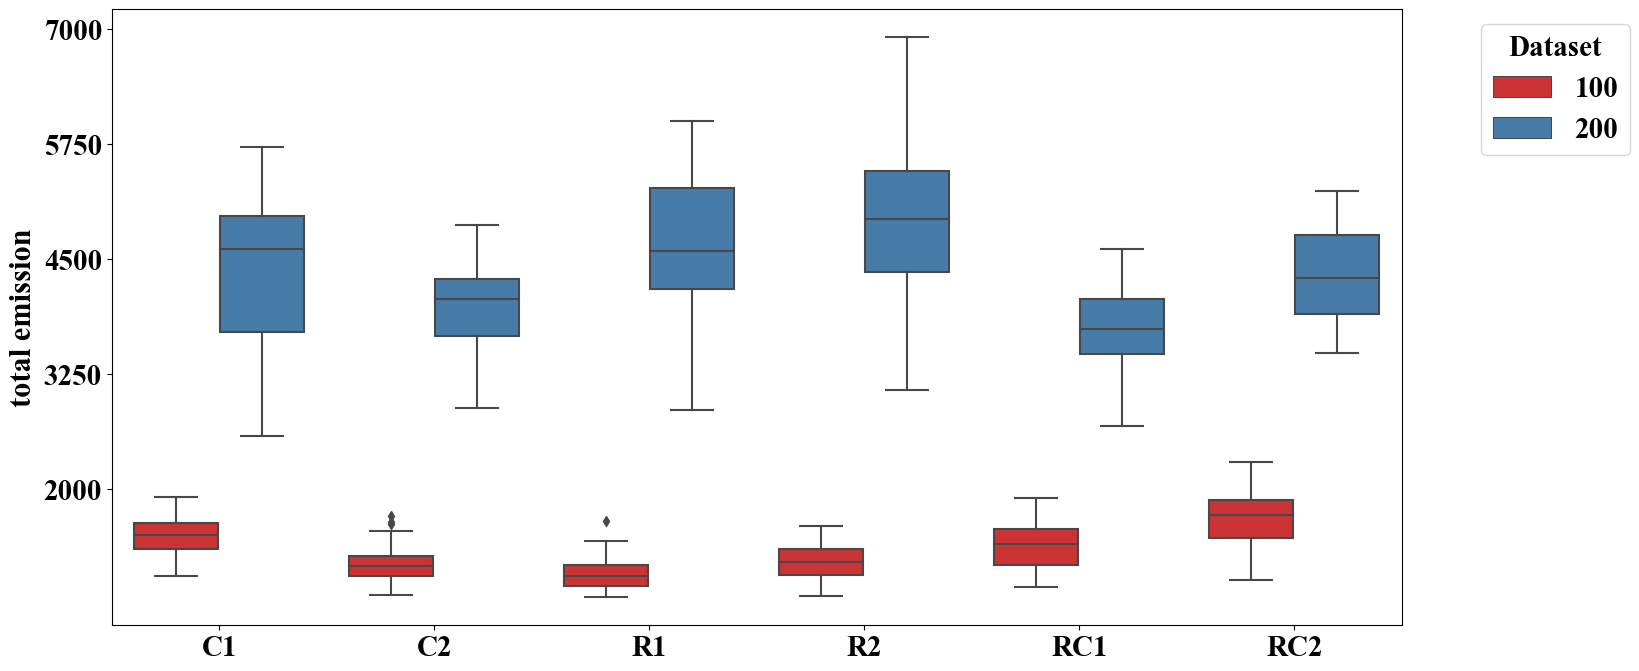

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the font family globally to Times New Roman and increase the font size
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 21  # Adjust this for the desired font size
plt.rcParams['font.weight'] = 'bold'

plt.figure(figsize=(12, 8))
sns.boxplot(data=combined_df, x='category', y='td', hue='source', palette="Set1")
plt.ylabel('total emission', fontsize=22, fontweight = 'bold')  # Increase font size of y-axis label
plt.xlabel('', fontsize=22, fontweight = 'bold')   # Increase font size of x-axis label


# y_min, y_max = plt.gca().get_ylim()  # Get the current y-axis limits
y_min = 2000
y_max = 7000
plt.yticks(np.linspace(y_min, y_max, 5))  

# Get current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Define custom labels
custom_labels = ['100','200']

# Update the legend with custom labels
legend = plt.legend(handles, custom_labels, title='Dataset', fontsize=21, bbox_to_anchor=(1.05, 1), loc='upper left')
# legend.get_title().set_fontsize(18)  # Set the title font size
# legend.get_title().set_fontweight('bold')  # Set the title font weight

plt.subplots_adjust(right=1.2)

plt.savefig("TD_boxplot_100_200.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()


In [4]:
combined_df_400 = pd.concat([df_400])

# Filter out any rows without a valid category label
combined_df_400 = combined_df_400.dropna(subset=['category'])

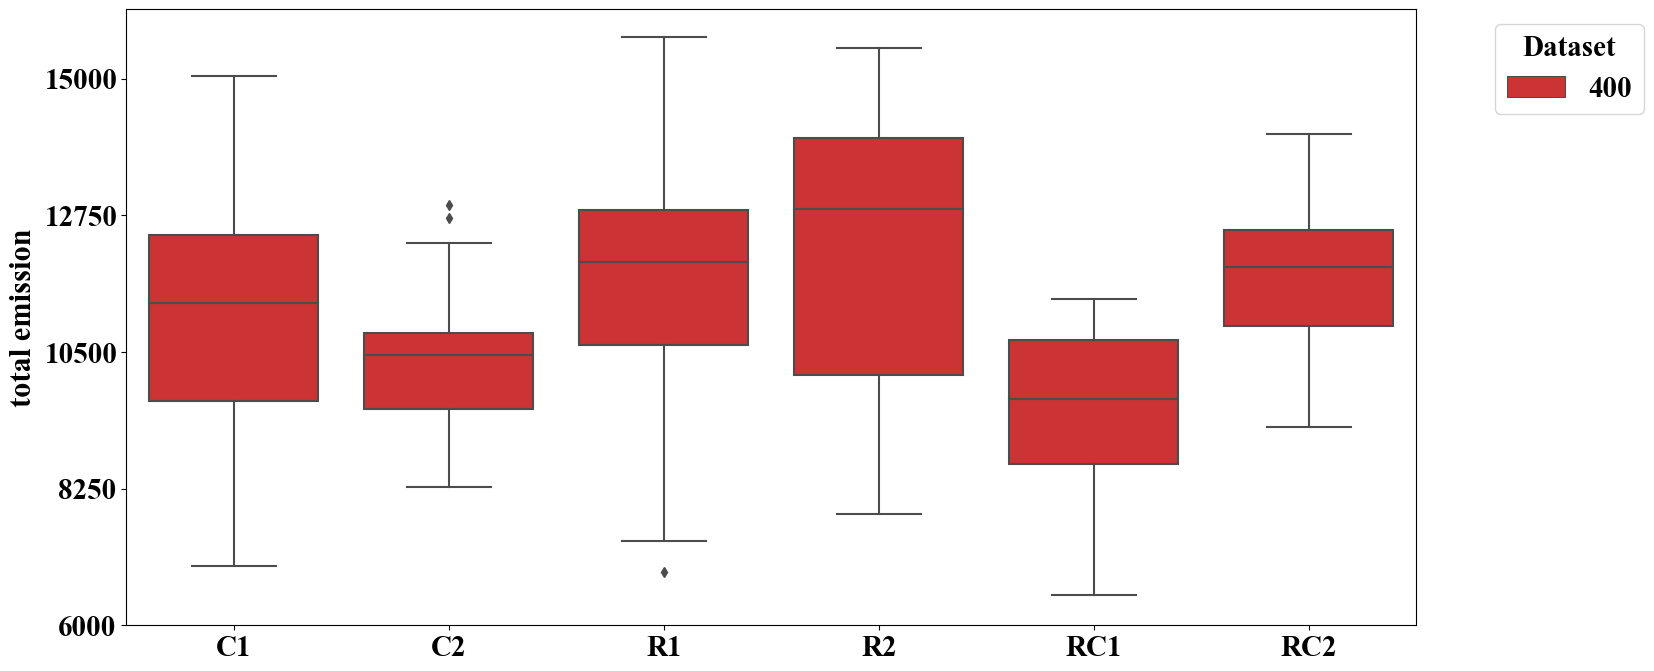

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the font family globally to Times New Roman and increase the font size
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 21  # Adjust this for the desired font size
plt.rcParams['font.weight'] = 'bold'

plt.figure(figsize=(12, 8))
sns.boxplot(data=combined_df_400, x='category', y='td', hue='source', palette="Set1")
plt.ylabel('total emission', fontsize=22, fontweight = 'bold')  # Increase font size of y-axis label
plt.xlabel('', fontsize=22, fontweight = 'bold')   # Increase font size of x-axis label


# y_min, y_max = plt.gca().get_ylim()  # Get the current y-axis limits
y_min = 6000
y_max = 15000
plt.yticks(np.linspace(y_min, y_max, 5))  

# Get current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Define custom labels
custom_labels = ['400']

# Update the legend with custom labels
legend = plt.legend(handles, custom_labels, title='Dataset', fontsize=21, bbox_to_anchor=(1.05, 1), loc='upper left')
# legend.get_title().set_fontsize(18)  # Set the title font size
# legend.get_title().set_fontweight('bold')  # Set the title font weight

plt.subplots_adjust(right=1.2)

plt.savefig("TD_boxplot_400.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()

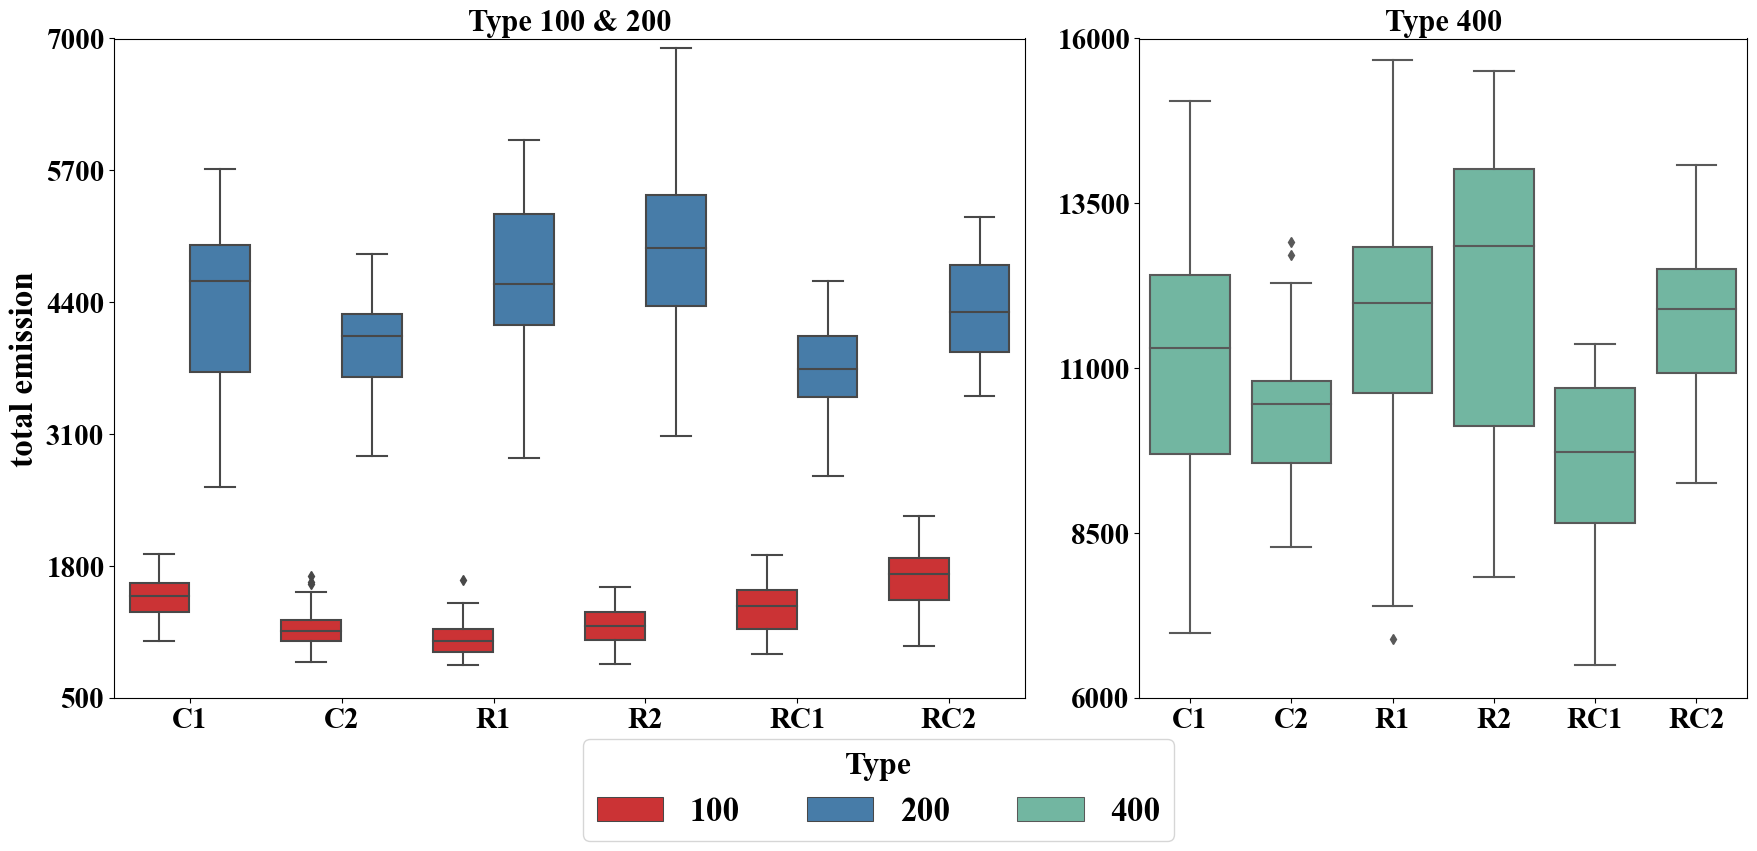

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

# Set the font family globally to Times New Roman and increase the font size
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 21  # Adjust this for the desired font size
plt.rcParams['font.weight'] = 'bold'

# Create a figure with a custom GridSpec layout
fig = plt.figure(figsize=(18, 8))  # Adjust figure size
gs = GridSpec(1, 2, width_ratios=[3, 2])  # 60% and 40% horizontal space allocation

# PLOT1: Dataset 100 & 200
ax1 = fig.add_subplot(gs[0])
sns.boxplot(data=combined_df, x='category', y='td', hue='source', palette="Set1", ax=ax1)
ax1.set_ylabel('total emission', fontsize=24, fontweight='bold')  # Increase font size of y-axis label
ax1.set_xlabel('', fontsize=22, fontweight='bold')  # Increase font size of x-axis label
ax1.set_ylim(500, 7000)
ax1.set_yticks(np.linspace(500, 7000, 6))
ax1.set_title("Type 100 & 200", fontsize=22, fontweight='bold')
ax1.legend([], [], frameon=False)  # Remove legend from subplot 1

# PLOT2: Dataset 400
ax2 = fig.add_subplot(gs[1])
sns.boxplot(data=combined_df_400, x='category', y='td', hue='source', palette="Set2", ax=ax2)  # Different color palette
ax2.set_ylabel('')  # Remove y-axis label for second plot
ax2.set_xlabel('', fontsize=22, fontweight='bold')  # Increase font size of x-axis label
ax2.set_ylim(6000, 16000)
ax2.set_yticks(np.linspace(6000, 16000, 5))
ax2.set_title("Type 400", fontsize=22, fontweight='bold')
ax2.legend([], [], frameon=False)  # Remove legend from subplot 2

# Create a shared legend below the figure
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels for a unified legend
handles = handles1 + handles2
custom_labels = ['100', '200', '400']
fig.legend(handles, custom_labels, title='Type', fontsize=24, title_fontsize=23, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.1))

# Adjust layout to accommodate the shared legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # Add space for the legend

# Save the figure
plt.savefig("TD_boxplot_combined_horizontal.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()


In [9]:
print(df_100)

         file_name  seed           td  rd  source category
0     h100c101.csv     1  1644.701000   0  df_100       C1
1     h100c101.csv     2  1618.996000   0  df_100       C1
2     h100c101.csv     3  1664.792000   0  df_100       C1
3     h100c101.csv     4  1774.085000   0  df_100       C1
4     h100c101.csv     5  1557.864000   0  df_100       C1
..             ...   ...          ...  ..     ...      ...
555  h100rc208.csv     6  1561.058032   0  df_100      RC2
556  h100rc208.csv     7  1288.672979   0  df_100      RC2
557  h100rc208.csv     8  1556.546833   0  df_100      RC2
558  h100rc208.csv     9  1283.394046   0  df_100      RC2
559  h100rc208.csv    10  1349.815271   0  df_100      RC2

[560 rows x 6 columns]


In [11]:
df_400["rd"] = df_400['rd'] + 300
result = df_400.groupby(['category']).agg({
    'rd': 'mean',
}).reset_index()
result

,category,rd
0,C1,0.280000
1,C2,0.043478
2,R1,1.500000
3,R2,0.076923
4,RC1,0.300000
5,RC2,0.000000


In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("F:\CodingEnvironment\dvrpsd\experiment\compare_algorithms_200_400.csv")
df100 = pd.read_csv("F:\CodingEnvironment\dvrpsd\experiment\compare_algorithms_100.csv")

In [2]:
def add_category_column_100(df):
    df['category'] = df['file_name'].str.extract(r'(c1|c2|r1|r2|rc1|rc2)', expand=False).str.upper()
    return df

# Function to extract category labels (for df_200 and df_400)
def add_category_column(df):
    df['category'] = df['file_name'].str.extract(r'(C1|C2|R1|R2|RC1|RC2)', expand=False)
    return df

In [3]:
# import re
ub200 = pd.read_csv(r'F:\CodingEnvironment\dvrpsd\experiment\upper_bound_200.csv')

ub200['data_path'] = ub200['data_path'].str.replace(r'0*(RC|C|R)', r'h200\1', regex=True)

ub200.head()
# import re
ub400 = pd.read_csv(r'F:\CodingEnvironment\dvrpsd\experiment\upperbound_400_100.csv')

ub400['data_path'] = ub400['data_path'].str.replace(r'0*(RC|C|R)', r'h400\1', regex=True)

ub400.head()


ub100 = pd.read_csv(r'F:\CodingEnvironment\dvrpsd\experiment\upperbound_100_25.csv')

ub100['data_path'] = ub100['data_path'].apply(lambda x: 'h' + x if not x.startswith('h') else x)

ub100.head()

,data_path,num_vehicle,carbon_upper,reject_upper
0,h100c101.csv,25,13636.226758,101
1,h100c102.csv,25,13636.226758,101
2,h100c103.csv,25,13636.226758,101
3,h100c104.csv,25,13636.226758,101
4,h100c105.csv,25,13636.226758,101


In [4]:
merged200 = pd.merge(df, ub200, left_on='file_name', right_on='data_path')
print(merged200.head)
merged200['obj'] = (merged200['td'] / merged200['carbon_upper'] + merged200['rd'] / merged200['reject_upper'])/2

# Select the required columns for the new DataFrame
new_df200 = merged200[['algorithm','file_name', 'td', 'rd', 'obj', 'time']].copy()
new_df200.head()

merged400 = pd.merge(df, ub400, left_on='file_name', right_on='data_path')
print(merged400.head)
merged400['obj'] = (merged400['td'] / merged400['carbon_upper'] + merged400['rd'] / merged400['reject_upper'])/2

# Select the required columns for the new DataFrame
new_df400 = merged400[['algorithm','file_name', 'td', 'rd', 'obj', 'time']].copy()
new_df400.head()

<bound method NDFrame.head of    algorithm        file_name  seed           td  rd        time  Unnamed: 6  \
0    inferv3   h200C1_2_1.csv     2  4615.072786   0  233.925861         NaN   
1    inferv3   h200C1_2_1.csv     3  3975.325049   0  233.079927         NaN   
2    inferv2   h200C1_2_1.csv     2  4434.091469   1  249.434959         NaN   
3    inferv2   h200C1_2_1.csv     3  4453.413117   2  245.735030         NaN   
4    inferv3   h200R1_2_1.csv     2  5201.287582   4  136.041360         NaN   
5    inferv3   h200R1_2_1.csv     3  4530.730767   5  133.074003         NaN   
6    inferv2   h200R1_2_1.csv     2  4687.860587   3  137.522048         NaN   
7    inferv2   h200R1_2_1.csv     3  4918.707802   4  137.748230         NaN   
8    inferv3  h200RC1_2_1.csv     2  3579.250974   1  108.273728         NaN   
9    inferv3  h200RC1_2_1.csv     3  3946.614544   0  104.703644         NaN   
10   inferv2  h200RC1_2_1.csv     2  3657.956583   4  111.888723         NaN   
11   infer

,algorithm,file_name,td,rd,obj,time
0,inferv3,h400C1_4_1.csv,9866.731263,4,0.042380,1463.348356
1,inferv3,h400C1_4_1.csv,9294.383867,7,0.043952,1501.378770
2,inferv3,h400C1_4_1.csv,9895.415491,0,0.037502,1426.287328
3,inferv2,h400C1_4_1.csv,8891.443162,0,0.033697,884.238659
4,inferv2,h400C1_4_1.csv,9348.138622,2,0.037921,906.677855


In [7]:
merged_100 = pd.merge(df100, ub100, left_on='file_name', right_on='data_path')
print(merged_100.head)
merged_100['obj'] = (merged_100['td'] / merged_100['carbon_upper'] + merged_100['rd'] / merged_100[' reject_upper'])/2

new_df100 = merged_100[['algorithm','file_name','td','rd','obj','time']].copy()
new_df100.head()

<bound method NDFrame.head of    algorithm      file_name  seed           td  rd        time      data_path  \
0    inferv3   h100c101.csv     1  1582.298934   0   78.615327   h100c101.csv   
1    inferv3   h100c101.csv     2  1930.738140   0   76.927642   h100c101.csv   
2    inferv3   h100c101.csv     3  1887.014470   0   78.700469   h100c101.csv   
3    inferv2   h100c101.csv     1  1624.453302   0  131.539228   h100c101.csv   
4    inferv2   h100c101.csv     2  1829.311045   0  131.285711   h100c101.csv   
5    inferv2   h100c101.csv     3  1885.310773   0  134.856257   h100c101.csv   
6    inferv3   h100r101.csv     1  1008.597551   0   21.491534   h100r101.csv   
7    inferv3   h100r101.csv     2  1205.159454   1   21.821001   h100r101.csv   
8    inferv3   h100r101.csv     3  1026.283166  10   24.470512   h100r101.csv   
9    inferv2   h100r101.csv     1  1152.441808   5   38.317695   h100r101.csv   
10   inferv2   h100r101.csv     2  1259.356490   3   37.767989   h100r101.csv  

,algorithm,file_name,td,rd,obj,time
0,inferv3,h100c101.csv,1582.298934,0,0.058018,78.615327
1,inferv3,h100c101.csv,1930.738140,0,0.070794,76.927642
2,inferv3,h100c101.csv,1887.014470,0,0.069191,78.700469
3,inferv2,h100c101.csv,1624.453302,0,0.059564,131.539228
4,inferv2,h100c101.csv,1829.311045,0,0.067075,131.285711


In [8]:
result200 = new_df200.groupby(['algorithm','file_name']).agg({
    'obj': 'mean',
}).reset_index()

In [9]:
result400 = new_df400.groupby(['algorithm','file_name']).agg({
    'obj': 'mean',
}).reset_index()

In [10]:
result100 = new_df100.groupby(['algorithm','file_name']).agg({
    'obj': 'mean',
}).reset_index()
result100.head()

,algorithm,file_name,obj
0,inferv2,h100c101.csv,0.065256
1,inferv2,h100c201.csv,0.026892
2,inferv2,h100r101.csv,0.066658
3,inferv2,h100r201.csv,0.058245
4,inferv2,h100rc101.csv,0.053150


In [11]:
result_full = pd.concat([result200, result400], ignore_index=True)
result_full

,algorithm,file_name,obj
0,inferv2,h200C1_2_1.csv,0.048651
1,inferv2,h200C2_2_1.csv,0.042741
2,inferv2,h200R1_2_1.csv,0.056501
3,inferv2,h200R2_2_1.csv,0.050666
4,inferv2,h200RC1_2_1.csv,0.042219
5,inferv2,h200RC2_2_1.csv,0.043241
6,inferv3,h200C1_2_1.csv,0.043418
7,inferv3,h200C2_2_1.csv,0.048823
8,inferv3,h200R1_2_1.csv,0.059612
9,inferv3,h200R2_2_1.csv,0.053817


In [12]:
pivoted = result_full.pivot(index="file_name", columns="algorithm", values="obj")

# Calculate the improvement percentage
pivoted["improvement (%)"] = ((pivoted["inferv3"] - pivoted["inferv2"]) / pivoted["inferv3"]) * 100

# Display the results
print(pivoted)

algorithm         inferv2   inferv3  improvement (%)
file_name                                           
h200C1_2_1.csv   0.048651  0.043418       -12.052542
h200C2_2_1.csv   0.042741  0.048823        12.457559
h200R1_2_1.csv   0.056501  0.059612         5.219892
h200R2_2_1.csv   0.050666  0.053817         5.854732
h200RC1_2_1.csv  0.042219  0.038655        -9.220361
h200RC2_2_1.csv  0.043241  0.039940        -8.264349
h400C1_4_1.csv   0.035850  0.041278        13.150229
h400C2_4_1.csv   0.033935  0.033436        -1.491024
h400R1_4_1.csv   0.040691  0.039365        -3.368974
h400R2_4_1.csv   0.045996  0.041893        -9.794829
h400RC1_4_1.csv  0.036080  0.037965         4.965983
h400RC2_4_1.csv  0.035265  0.037809         6.729559


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract type and category from `file_name`
result_full['type'] = result_full['file_name'].str.extract(r'h(\d+)')[0]
result_full['category'] = result_full['file_name'].str.extract(r'(C\d|R\d|RC\d)')[0]

result_full.head()

,algorithm,file_name,obj,type,category
0,inferv2,h200C1_2_1.csv,0.048651,200,C1
1,inferv2,h200C2_2_1.csv,0.042741,200,C2
2,inferv2,h200R1_2_1.csv,0.056501,200,R1
3,inferv2,h200R2_2_1.csv,0.050666,200,R2
4,inferv2,h200RC1_2_1.csv,0.042219,200,RC1


In [11]:
result100['type'] = result100['file_name'].str.extract(r'h(\d+)')[0]
result100['category'] = result100['file_name'].str.extract(r'(c\d|r\d|rc\d)')[0].str.upper()

result100.head()

,algorithm,file_name,obj,type,category
0,inferv2,h100c101.csv,0.065256,100,C1
1,inferv2,h100c201.csv,0.026892,100,C2
2,inferv2,h100r101.csv,0.066658,100,R1
3,inferv2,h100r201.csv,0.058245,100,R2
4,inferv2,h100rc101.csv,0.053150,100,RC1


In [12]:
result_full = pd.concat([result_full, result100], ignore_index=True)

In [13]:
result_full

,algorithm,file_name,obj,type,category
0,inferv2,h200C1_2_1.csv,0.048651,200,C1
1,inferv2,h200C2_2_1.csv,0.042741,200,C2
2,inferv2,h200R1_2_1.csv,0.056501,200,R1
3,inferv2,h200R2_2_1.csv,0.050666,200,R2
4,inferv2,h200RC1_2_1.csv,0.042219,200,RC1
5,inferv2,h200RC2_2_1.csv,0.043241,200,RC2
6,inferv3,h200C1_2_1.csv,0.043418,200,C1
7,inferv3,h200C2_2_1.csv,0.048823,200,C2
8,inferv3,h200R1_2_1.csv,0.059612,200,R1
9,inferv3,h200R2_2_1.csv,0.053817,200,R2


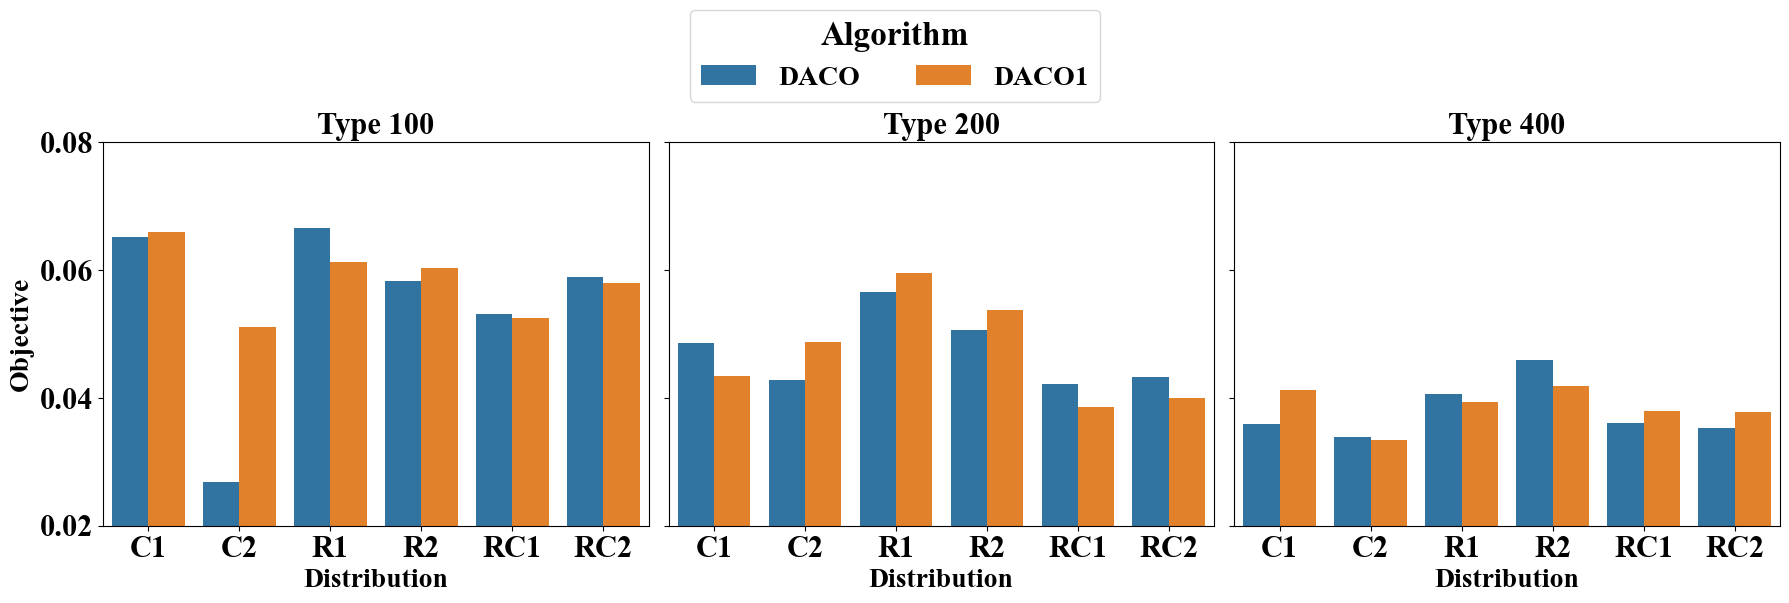

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.font_manager import FontProperties

# Filter data for types 100, 200, and 400
df_100 = result_full[result_full['type'] == '100']
df_200 = result_full[result_full['type'] == '200']
df_400 = result_full[result_full['type'] == '400']

# Set up the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for type 100
sns.barplot(data=df_100, x="category", y="obj", hue="algorithm", ci=None, ax=ax1)
ax1.set_xlabel("Distribution", fontsize=20, fontname="Times New Roman", fontweight='bold')
ax1.set_ylabel("Objective", fontsize=20, fontname="Times New Roman", fontweight='bold')
ax1.set_title("Type 100", fontsize=22, fontname="Times New Roman", fontweight='bold')
ax1.legend_.remove()  # Remove the legend from the first plot

# Plot for type 200
sns.barplot(data=df_200, x="category", y="obj", hue="algorithm", ci=None, ax=ax2)
ax2.set_xlabel("Distribution", fontsize=20, fontname="Times New Roman", fontweight='bold')
ax2.set_title("Type 200", fontsize=22, fontname="Times New Roman", fontweight='bold')
ax2.set_ylabel("")  # Remove y-axis label on the second plot
ax2.legend_.remove()

# Plot for type 400
sns.barplot(data=df_400, x="category", y="obj", hue="algorithm", ci=None, ax=ax3)
ax3.set_xlabel("Distribution", fontsize=20, fontname="Times New Roman", fontweight='bold')
ax3.set_title("Type 400", fontsize=22, fontname="Times New Roman", fontweight='bold')
ax3.set_ylabel("")  # Remove y-axis label on the third plot
ax3.legend_.remove()

# Set y-axis limits and ticks
ax1.set_ylim(0.02, 0.08)
ax1.set_yticks(np.arange(0.02, 0.081, 0.02))
for tick in ax1.get_yticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(22)
    tick.set_fontweight('bold')

# Set font properties for x-axis tick labels in all subplots
for ax in [ax1, ax2, ax3]:
    for tick in ax.get_xticklabels():
        tick.set_fontname("Times New Roman")
        tick.set_fontsize(22)
        tick.set_fontweight('bold')

# Create a single shared legend for all plots with an increased title font size
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, ["DACO", "DACO1"], title="Algorithm", loc="upper center", bbox_to_anchor=(0.5, 1.02), fontsize=35,
           title_fontproperties=FontProperties(weight='bold', family="Times New Roman", size=24),
           prop=FontProperties(weight='bold', family="Times New Roman", size=20), ncol=2)

# Adjust layout to make room for the shared legend and prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.85])  # Adjusted to make more room for the legend

# Save the combined plot
plt.savefig("CA_combined_100_200_400.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()

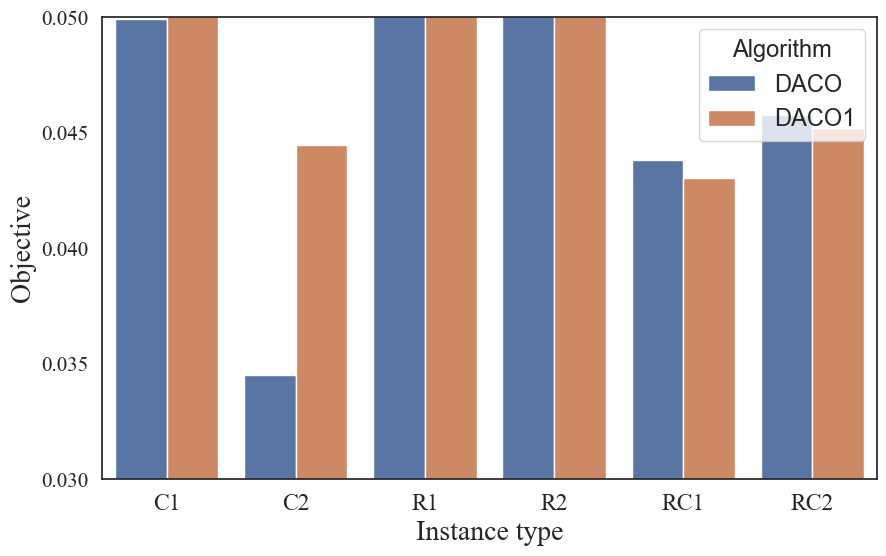

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming result_full contains your data
plt.figure(figsize=(10, 6))

# Bar plot with customizations
sns.barplot(data=result_full, x="category", y="obj", hue="algorithm", ci=None)
# plt.title("Objective comparison of DACO vs DACO1", fontsize=16, fontname="Times New Roman")
plt.xlabel("Instance type", fontsize=20, fontname="Times New Roman")
plt.ylabel("Objective", fontsize=20, fontname="Times New Roman")

# Customize the legend
plt.legend(title="Algorithm", labels=["DACO", "DACO1"], fontsize=17, title_fontsize=17)

# Set y-axis range
plt.ylim(0.03, 0.05)
plt.yticks(np.arange(0.03, 0.051, 0.005), fontname="Times New Roman", fontsize=15)

# Change font for tick labels
plt.xticks(fontsize=17, fontname="Times New Roman")
# plt.yticks(fontsize=17, fontname="Times New Roman")
plt.savefig("CA_combined.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()


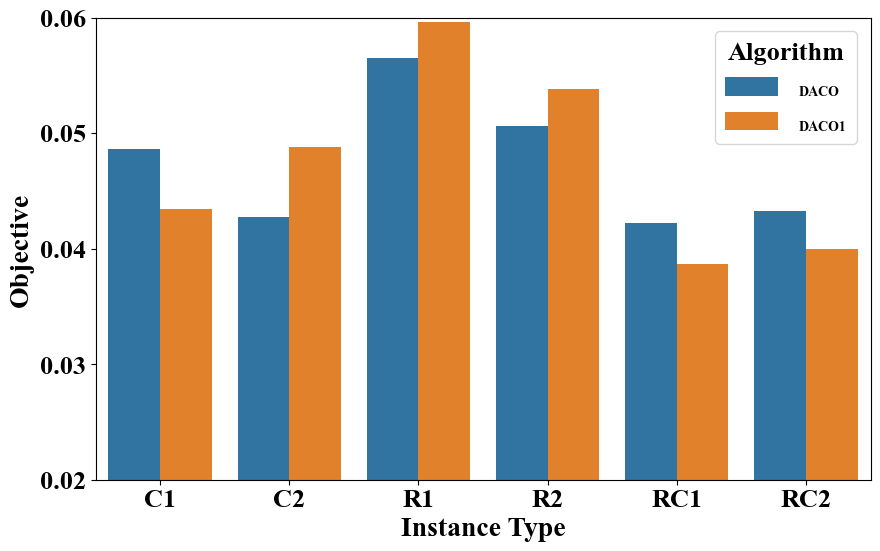

In [102]:
df_200 = result_full[result_full['type'] == '200']

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.font_manager import FontProperties

# Assuming result_full contains your data
plt.figure(figsize=(10, 6))

# Bar plot with customizations
sns.barplot(data=df_200, x="category", y="obj", hue="algorithm", ci=None)

# Labels with bold text and increased font size
plt.xlabel("Instance Type", fontsize=20, fontname="Times New Roman", fontweight='bold')
plt.ylabel("Objective", fontsize=20, fontname="Times New Roman", fontweight='bold')

# Customize the legend
legend = plt.legend(title="Algorithm", labels=["DACO", "DACO1"], fontsize=19)
legend.set_title("Algorithm", prop=FontProperties(size=19, weight='bold', family="Times New Roman"))

# Set font properties for legend labels
for text in legend.get_texts():
    text.set_fontproperties(FontProperties(weight='bold', family="Times New Roman"))

# Set y-axis range
plt.ylim(0.02, 0.06)
plt.yticks(np.arange(0.02, 0.061, 0.01), fontname="Times New Roman", fontsize=19, fontweight='bold')

# Set bold text for x-axis tick labels
plt.xticks(fontsize=19, fontname="Times New Roman", fontweight='bold')

# Save plot
plt.savefig("CA_200.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()

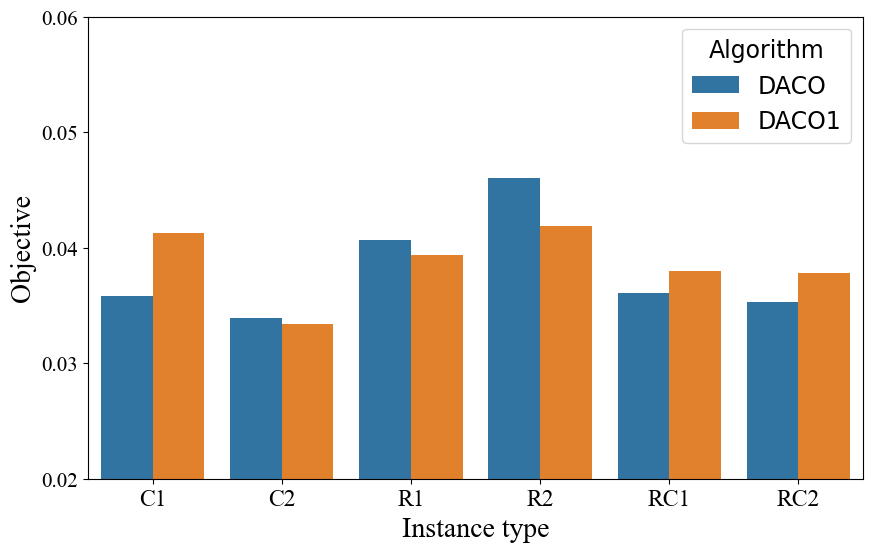

In [95]:
df_400 = result_full[result_full['type'] == '400']
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming result_full contains your data
plt.figure(figsize=(10, 6))

# Bar plot with customizations
sns.barplot(data=df_400, x="category", y="obj", hue="algorithm", ci=None)
# plt.title("Objective comparison of DACO vs DACO1", fontsize=16, fontname="Times New Roman")
plt.xlabel("Instance type", fontsize=20, fontname="Times New Roman")
plt.ylabel("Objective", fontsize=20, fontname="Times New Roman")

# Customize the legend
plt.legend(title="Algorithm", labels=["DACO", "DACO1"], fontsize=17, title_fontsize=17)

# Set y-axis range
plt.ylim(0.02, 0.06)
plt.yticks(np.arange(0.02, 0.061, 0.01), fontname="Times New Roman", fontsize=15)

# Change font for tick labels
plt.xticks(fontsize=17, fontname="Times New Roman")
# plt.yticks(fontsize=17, fontname="Times New Roman")
plt.savefig("CA_400.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()